# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Exploratory Data Analysis


In [2]:
df = pd.read_csv("heart.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Details about data 

- Age - Persons age in years
- Sex - (Female-0 , Male-1)
- Cp  - Chest pain type 
           0-Typical angina (It is the discomfort that is noted when the heart does not get enough blood or oxygen.It 
                             usually occurs when a person does some exercise)
           1-Atypical angina (chest pain not heart related and not of burning quality.It usually occurs when a person is 
                              at rest)
           2-Non-anginal pain (chest pain that resembles heart pain in patients who do not have heart disease)
           3-Asymptomatic (chest pain not showing signs of disease)
- trestbps - Resting blood pressure (in mm Hg on admission to the hospital)
           An optimal blood pressure level is a reading under 120/80 mmHg.
- chol - serum cholesterol in mg/dl
           serum = LDL(low density lipoprotein and it is bad) + HDL(high density lipoprotein and it is good) + 
                   .2 * triglycerides
           above 200 is cause for concern.
- fbs - fasting blood sugar 
           0-(<= 120 mg/dl)
           1-(> 120 mg/dl)
           fasting blood sugar level less than 100 mg/dL is normal.
           fasting blood sugar level from 100 to 125 mg/dL is concidered prediabetes.
           fasting blood sugar level from 126 mg/dL or higher is concidered diabetes.
- restecg -  resting electrocardiographic results
               0-normal
               1-ST-T Wave abnormality (unusual behaviour of heart)
               2-left ventricular hypertrophy (Enlarged heart's main pumping chamber)
- thalach - Person's maximum heart rate achieved

- exang - exercise induced angina 
               0-No
               1-Yes
- oldpeak - ST depression induced by exercise relative to rest
- slope - the slope of the peak exercise ST segment
               0-Upsloping (better heart rate with excercise)
               1-Flatsloping (minimal change or typical healthy heart)
               2-Downsloping (signs of unhealthy heart)
- ca - number of major vessels (0-4) colored by flourosopy
               Colored vessel means the doctor can see the blood passing through.
               More the blood movement better the heart (no clots).
               
- thal - thalasemia
               0,1-Normal
               2-fixed defect
               3-reversable defect
- target - Disease result
               0-No
               1-Yes


In [4]:
df.shape

(303, 14)

- Dataset contain 303 data and 14 attributes or features.

In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Missing values

In [6]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

- There are no missing values in the dataset.

# Data Formatting

To make analysis easier columns are changed to meaningful names.

In [7]:
df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

# Data Visualization

(14.0, 0.0)

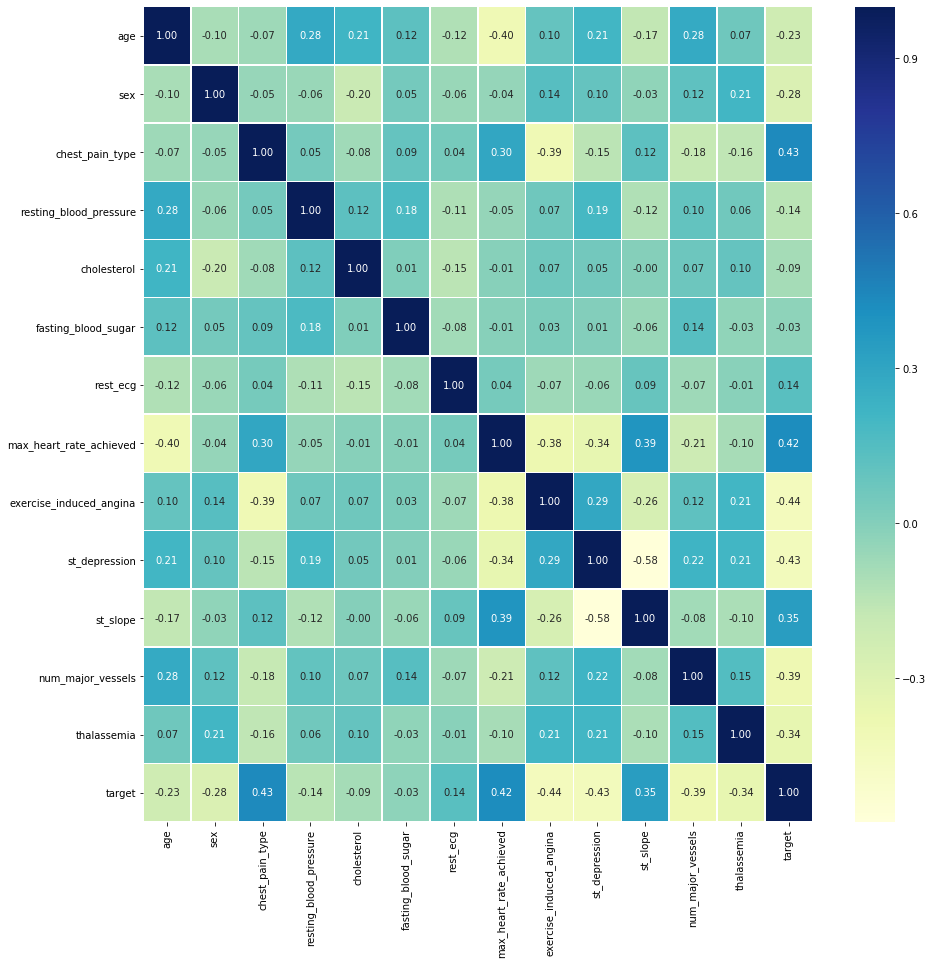

In [8]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

Text(0.5, 1.0, 'Heart Disease ')

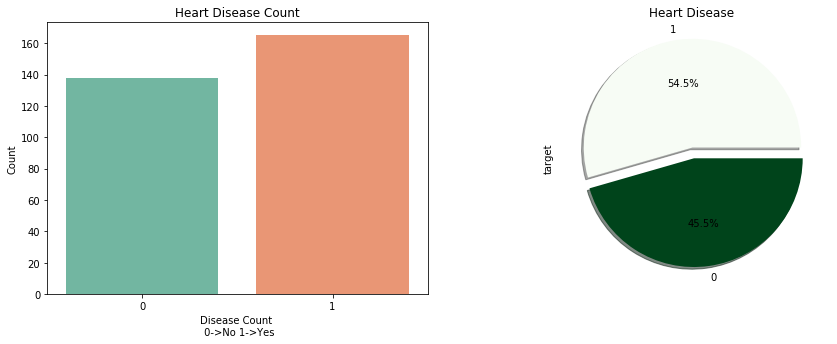

In [9]:
fig,ax=plt.subplots(1, 2, figsize = (15,5))
sns.countplot(data=df, x='target', ax=ax[0],palette='Set2')
ax[0].set_xlabel("Disease Count \n 0->No 1->Yes")
ax[0].set_ylabel("Count")
ax[0].set_title("Heart Disease Count")
df['target'].value_counts().plot.pie(explode=[0.1,0.0],autopct='%1.1f%%',ax=ax[1],shadow=True, cmap='Greens')
plt.title("Heart Disease ")

- Percentage of Patients not Having Heart Disease: 45.5%
- Percentage of Patients Having Heart Disease: 54.4%

# Analyzing Categorical feaures

### Sex

Text(0.5, 1.0, '0 ->Female , 1 -> Male')

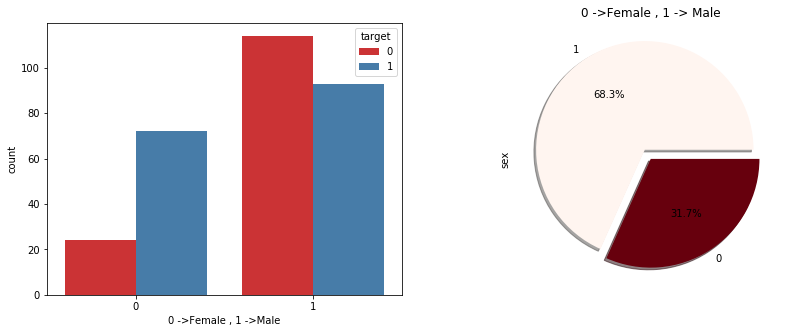

In [10]:
fig,ax=plt.subplots(1,2,figsize=(14,5))
sns.countplot(x='sex',data=df,hue='target',palette='Set1',ax=ax[0])
ax[0].set_xlabel("0 ->Female , 1 ->Male")
df.sex.value_counts().plot.pie(ax=ax[1],autopct='%1.1f%%',shadow=True, explode=[0.1,0], cmap='Reds')
ax[1].set_title("0 ->Female , 1 -> Male")

- Number of Women suffering from Heart Disease are more than Men but Men population is more than Women

### Fasting blood sugar

Text(0.5, 1.0, '0 -> fbs <120 , 1 -> fbs>120')

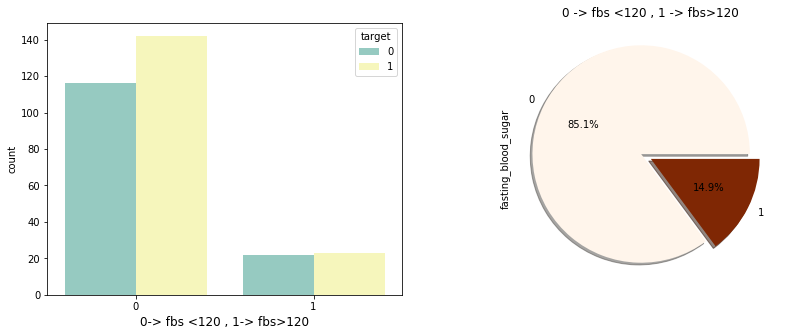

In [11]:
fig,ax=plt.subplots(1,2,figsize=(14,5))
sns.countplot(x='fasting_blood_sugar',data=df,hue='target',palette='Set3',ax=ax[0])
ax[0].set_xlabel("0-> fbs <120 , 1-> fbs>120",size=12)
df.fasting_blood_sugar.value_counts().plot.pie(ax=ax[1],autopct='%1.1f%%',shadow=True, explode=[0.1,0],cmap='Oranges')
ax[1].set_title("0 -> fbs <120 , 1 -> fbs>120",size=12)


- People having fbs < 120 have more chance of having Heart Disease than people havnig fbs >120

### Resting electrocardiographic results

Text(0.5, 1.0, 'resting electrocardiographic')

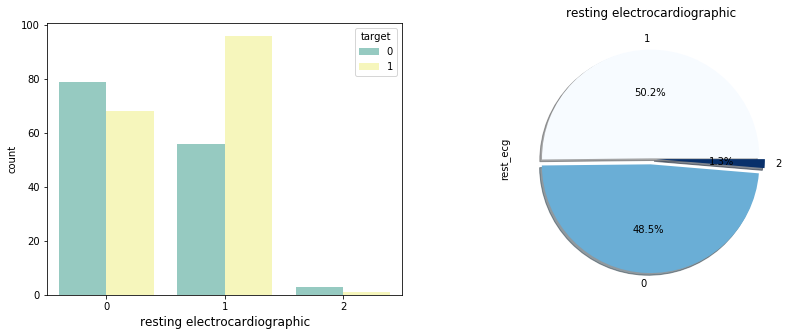

In [12]:
fig,ax=plt.subplots(1,2,figsize=(14,5))
sns.countplot(x='rest_ecg',data=df,hue='target',palette='Set3',ax=ax[0])
ax[0].set_xlabel("resting electrocardiographic",size=12)
df.rest_ecg.value_counts().plot.pie(ax=ax[1],autopct='%1.1f%%',shadow=True,
                                     explode=[0.005,0.05,0.05],cmap='Blues')
ax[1].set_title("resting electrocardiographic",size=12)

- If resting electrocardiographic is 1 then person have more chances of suffering from Heart Disease

### The slope of the peak exercise ST segment 

Text(0.5, 1.0, 'peak exercise ST segment ')

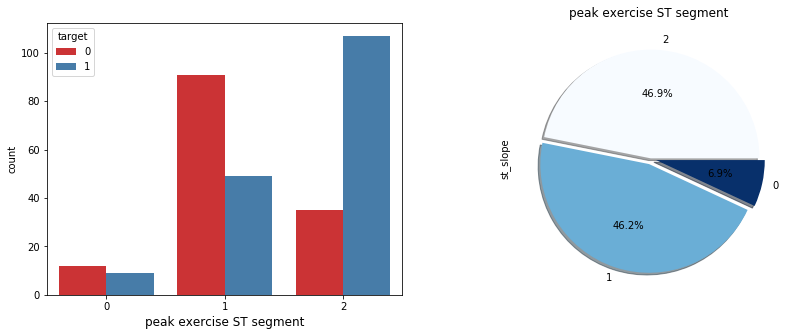

In [13]:
fig,ax=plt.subplots(1,2,figsize=(14,5))
sns.countplot(x='st_slope',data=df,hue='target',palette='Set1',ax=ax[0])
ax[0].set_xlabel("peak exercise ST segment",size=12)
df.st_slope.value_counts().plot.pie(ax=ax[1],autopct='%1.1f%%',shadow=True,explode=[0.005,0.05,0.05],cmap='Blues')

ax[1].set_title("peak exercise ST segment ",size=12)

- People having up sloping are more prone to Heart Disease than flat and downsloping.

### Number of major vessels colored by flourosopy

Text(0.5, 1.0, 'number of major vessels colored by flourosopy')

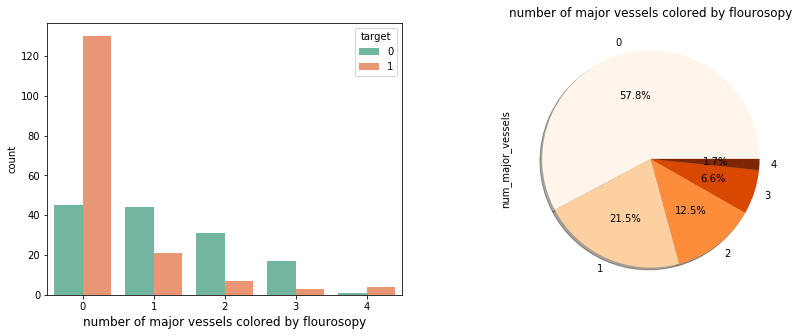

In [14]:
fig,ax=plt.subplots(1,2,figsize=(14,5))
sns.countplot(x='num_major_vessels',data=df,hue='target',palette='Set2',ax=ax[0])
ax[0].set_xlabel("number of major vessels colored by flourosopy",size=12)
df.num_major_vessels.value_counts().plot.pie(ax=ax[1],autopct='%1.1f%%',shadow=True,cmap='Oranges')
ax[1].set_title("number of major vessels colored by flourosopy",size=12)

- The more lighter the color the more probability the person can have Heart disease.

### Thalassemia

Text(0.5, 1.0, 'Thalassemia')

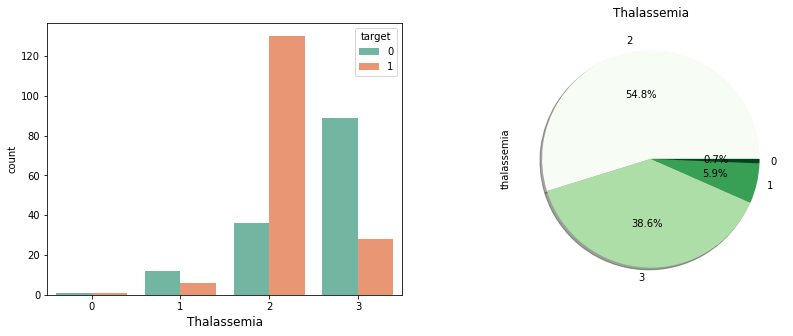

In [15]:
fig,ax=plt.subplots(1,2,figsize=(14,5))
sns.countplot(x='thalassemia',data=df,hue='target',palette='Set2',ax=ax[0])
ax[0].set_xlabel("Thalassemia",size=12)
df.thalassemia.value_counts().plot.pie(ax=ax[1],autopct='%1.1f%%',shadow=True,cmap='Greens')
ax[1].set_title("Thalassemia",size=12)

- It is obvious that fixed defect cause heart disease at a larger rate.

### Chest Pain

Text(0.5, 1.0, 'Chest pain')

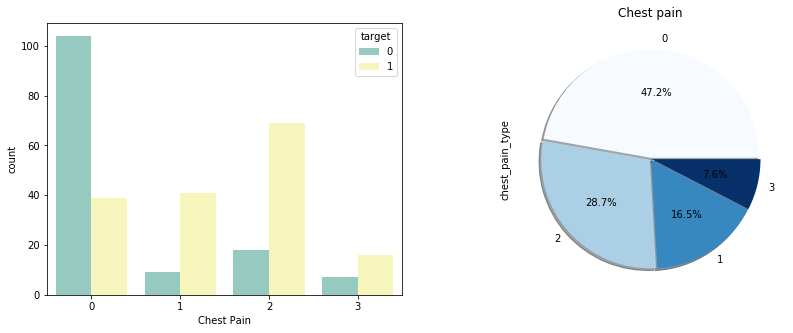

In [16]:
fig,ax=plt.subplots(1,2,figsize=(14,5))
sns.countplot(x='chest_pain_type',data=df,hue='target',palette='Set3',ax=ax[0])
ax[0].set_xlabel("Chest Pain")
df.chest_pain_type.value_counts().plot.pie(ax=ax[1],autopct='%1.1f%%',explode=[0.01,0.01,0.01,0.01],shadow=True, cmap='Blues')
ax[1].set_title("Chest pain")

- People with typical angina has less chance of getting heart disease when compared with other chest pain type, which have a large probability of getting heart disease.

# Analyzing Continuos feaures

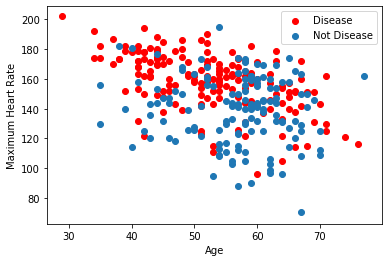

In [17]:
plt.scatter(x=df.age[df.target==1], y=df.max_heart_rate_achieved[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.max_heart_rate_achieved[(df.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

- The above scatterplot clearly conveys the message that if heart rate is more the person is more likely to have heart disease.
  In case of aged people less heart rate can cause disease.Age is negatively correlated with Disease and maximum heart rate.

# Analyzing by combining Continuous feature with categorial feature


### Resting blood pressure vs Sex

Text(0.5, 1.0, 'resting blood pressure V/S Sex')

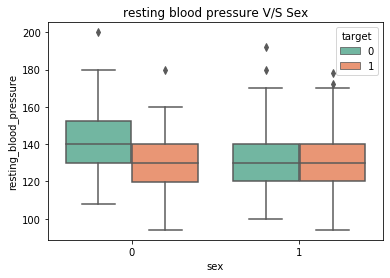

In [18]:
fig,ax=plt.subplots()
sns.boxplot(y='resting_blood_pressure',data=df,x='sex',hue='target',palette='Set2')
ax.set_title("resting blood pressure V/S Sex")



- resting blood pressure has a impact on female (i.e) female with high blood pressure has less chance of heart disease

### Cholestrol vs Sex

Text(0.5, 1.0, 'Cholestrol V/S Sex')

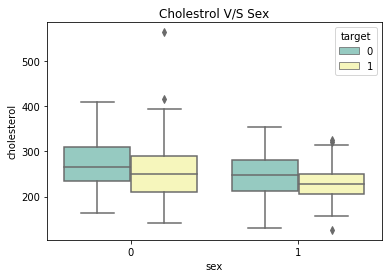

In [19]:
fig,ax=plt.subplots()
sns.boxplot(y='cholesterol',data=df,x='sex',hue='target',palette='Set3')
ax.set_title("Cholestrol V/S Sex")

- people with less cholestrol might have heart disease 

### Distribution of features

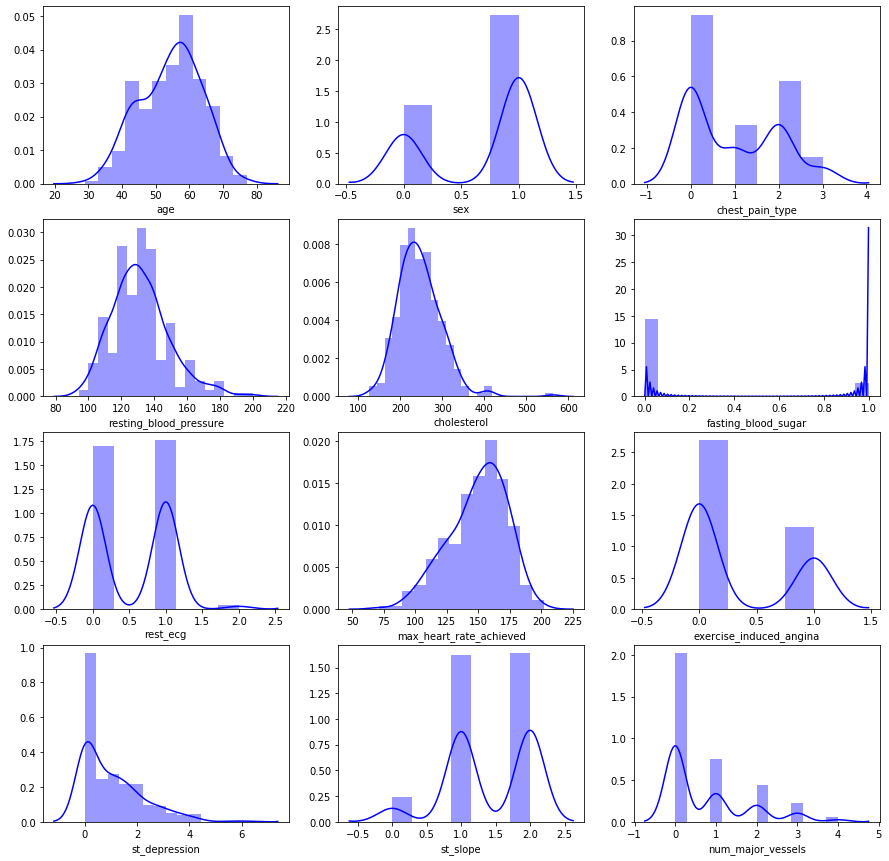

In [20]:
fig,ax=plt.subplots(4,3,figsize=(15,15))
for i in range(12):
    plt.subplot(4,3,i+1)
    sns.distplot(df.iloc[:,i],kde=True, color='blue')

# One hot encoding

converting categorial features into discrete features

In [21]:
a = pd.get_dummies(df['chest_pain_type'], prefix = "chest_pain_type")
b = pd.get_dummies(df['thalassemia'], prefix = "thalassemia")
c = pd.get_dummies(df['st_slope'], prefix = "st_slope")

In [22]:
frames = [df, a, b, c]
df = pd.concat(frames, axis = 1)
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,...,chest_pain_type_1,chest_pain_type_2,chest_pain_type_3,thalassemia_0,thalassemia_1,thalassemia_2,thalassemia_3,st_slope_0,st_slope_1,st_slope_2
0,63,1,3,145,233,1,0,150,0,2.3,...,0,0,1,0,1,0,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,0,1,0,0,0,1,0,1,0,0
2,41,0,1,130,204,0,0,172,0,1.4,...,1,0,0,0,0,1,0,0,0,1
3,56,1,1,120,236,0,1,178,0,0.8,...,1,0,0,0,0,1,0,0,0,1
4,57,0,0,120,354,0,1,163,1,0.6,...,0,0,0,0,0,1,0,0,0,1


In [23]:
df = df.drop(columns = ['chest_pain_type', 'thalassemia', 'st_slope'])
df.head()

,age,sex,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,num_major_vessels,...,chest_pain_type_1,chest_pain_type_2,chest_pain_type_3,thalassemia_0,thalassemia_1,thalassemia_2,thalassemia_3,st_slope_0,st_slope_1,st_slope_2
0,63,1,145,233,1,0,150,0,2.3,0,...,0,0,1,0,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,...,0,1,0,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,...,1,0,0,0,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,...,1,0,0,0,0,1,0,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,...,0,0,0,0,0,1,0,0,0,1


# Normalization

In [24]:
data_scaled=MinMaxScaler().fit_transform(df)
data_scaled=pd.DataFrame(data=data_scaled, columns=df.columns)
data_scaled.head()

,age,sex,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,num_major_vessels,...,chest_pain_type_1,chest_pain_type_2,chest_pain_type_3,thalassemia_0,thalassemia_1,thalassemia_2,thalassemia_3,st_slope_0,st_slope_1,st_slope_2
0,0.708333,1.0,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.166667,1.0,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.250000,0.0,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.562500,1.0,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.583333,0.0,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [25]:
X = df.iloc[:, df.columns != 'target'].values
Y = df.iloc[:, df.columns == 'target'].values.ravel()

# Train-Test split

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size =0.2, random_state = 0)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(242, 21)
(242,)
(61, 21)
(61,)


# Modelling

### Logistic regression

In [27]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
y_pred = logreg.predict(X_test)
acc_logreg=logreg.score(X_test, Y_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(acc_logreg))

Accuracy of logistic regression classifier on test set: 0.85


(2.0, 0.0)

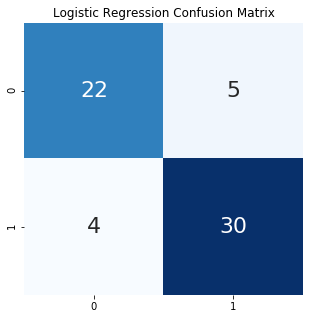

In [29]:
confusion_matrix_Logreg = confusion_matrix(Y_test, y_pred)
fig, ax = plt.subplots(figsize=(5, 5))
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(confusion_matrix_Logreg,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 22})
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

### K Nearest Neighbour(KNN)

In [30]:
error = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != Y_test))

Text(0, 0.5, 'Mean Error')

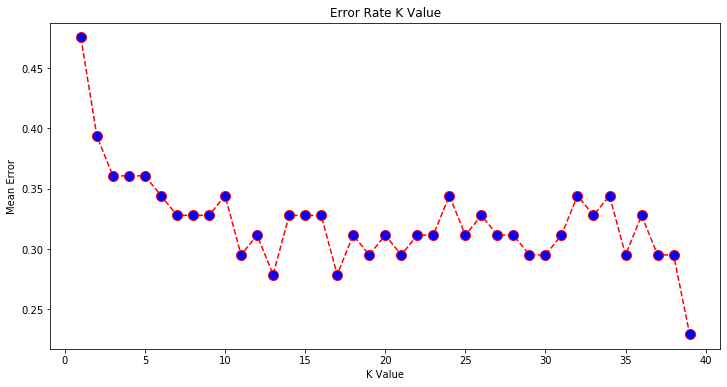

In [31]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

- from the above plot 7 would be a ideal value of K with a error of about 0.32

In [32]:
KNN = KNeighborsClassifier(n_neighbors=7)
KNN.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [33]:
y_pred = KNN.predict(X_test)
acc_KNN=KNN.score(X_test, Y_test)
print('Accuracy of KNN classifier on test set: {:.2f}'.format(acc_KNN))

Accuracy of KNN classifier on test set: 0.67


(2.0, 0.0)

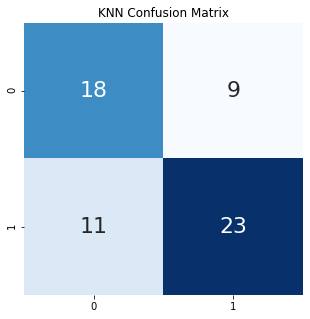

In [34]:
confusion_matrix_KNN = confusion_matrix(Y_test, y_pred)
fig, ax = plt.subplots(figsize=(5, 5))
plt.title("KNN Confusion Matrix")
sns.heatmap(confusion_matrix_KNN,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 22})
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

### Support vector machine

In [35]:
SVM = SVC( kernel='linear')
SVM.fit(X_train,Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [36]:
y_pred = SVM.predict(X_test)
acc_SVM=SVM.score(X_test, Y_test)
print('Accuracy of KNN classifier on test set: {:.2f}'.format(acc_SVM))

Accuracy of KNN classifier on test set: 0.85


(2.0, 0.0)

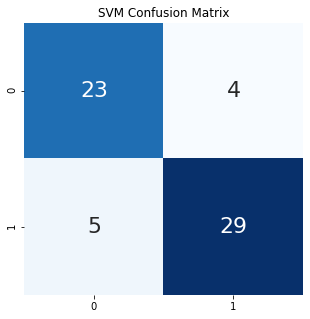

In [37]:
confusion_matrix_SVM = confusion_matrix(Y_test, y_pred)
fig, ax = plt.subplots(figsize=(5, 5))
plt.title("SVM Confusion Matrix")
sns.heatmap(confusion_matrix_SVM,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 22})
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

### Naive Bayes

In [38]:
NB = GaussianNB()
NB.fit(X_train,Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [39]:
y_pred = NB.predict(X_test)
acc_NB=NB.score(X_test, Y_test)
print('Accuracy of NB classifier on test set: {:.2f}'.format(acc_NB))

Accuracy of NB classifier on test set: 0.87


(2.0, 0.0)

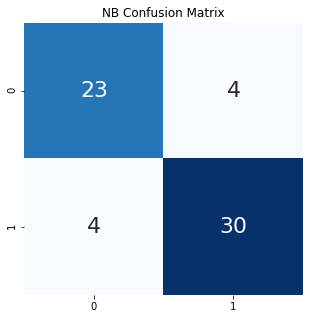

In [40]:
confusion_matrix_NB = confusion_matrix(Y_test, y_pred)
fig, ax = plt.subplots(figsize=(5, 5))
plt.title("NB Confusion Matrix")
sns.heatmap(confusion_matrix_NB,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 22})
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

### Decision Tree 

In [41]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [42]:
y_pred = decision_tree.predict(X_test)
acc_decision_tree=decision_tree.score(X_test, Y_test)
print('Accuracy of Decision tree classifier on test set: {:.2f}'.format(acc_decision_tree))

Accuracy of Decision tree classifier on test set: 0.79


(2.0, 0.0)

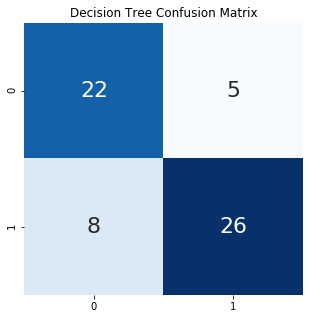

In [43]:
confusion_matrix_decision_tree = confusion_matrix(Y_test, y_pred)
fig, ax = plt.subplots(figsize=(5, 5))
plt.title("Decision Tree Confusion Matrix")
sns.heatmap(confusion_matrix_decision_tree,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 22})
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

### Random Forest

In [44]:
random_forest = RandomForestClassifier(n_estimators=64, random_state=0)
random_forest.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=64,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [45]:
y_pred = random_forest.predict(X_test)
acc_random_forest = random_forest.score(X_test, Y_test)
print('Accuracy of Random forest classifier on test set: {:.2f}'.format(acc_random_forest))

Accuracy of Random forest classifier on test set: 0.89


(2.0, 0.0)

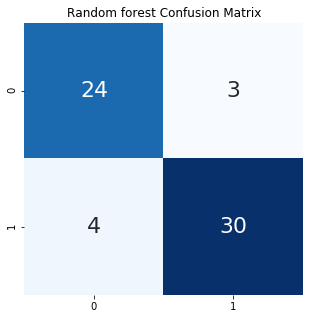

In [46]:
confusion_matrix_random_forest = confusion_matrix(Y_test, y_pred)
fig, ax = plt.subplots(figsize=(5, 5))
plt.title("Random forest Confusion Matrix")
sns.heatmap(confusion_matrix_random_forest,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 22})
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

# Comparing Models

In [47]:

models = pd.DataFrame({
    'Model': ['Logistic regression', 'K Nearest Neighbour','Naive Bayes'
              , 'Decision Tree','Random Forest'],
    'Score': [acc_logreg*100, acc_KNN*100, acc_NB*100, 
              acc_decision_tree*100, acc_random_forest*100]})
models.sort_values(by='Score', ascending=False)

,Model,Score
4,Random Forest,88.524590
2,Naive Bayes,86.885246
0,Logistic regression,85.245902
3,Decision Tree,78.688525
1,K Nearest Neighbour,67.213115


- KNN couldn't generalize well to the test set.Other algorithms works better for this dataset. 